In [24]:
import pandas as pd
import os
import re

# Detectamos los archivos csv válidos (los que tienen datos de absorbancia)
archivos_csv = [f for f in os.listdir() if f.endswith('.csv') and f != 'TVeMN.csv']

# Función para extraer gramaje del nombre del archivo
def extraer_gramos(nombre):
    match = re.search(r'(\d+_?\d*)g', nombre)
    if match:
        return float(match.group(1).replace('_', '.'))
    return float('inf')

# Ordenamos los archivos por gramaje (más limpio para visualizar después)
archivos_ordenados = sorted(archivos_csv, key=extraer_gramos)

# Leemos y procesamos los archivos
dataframes = []
for archivo in archivos_ordenados:
    df = pd.read_csv(archivo, sep=None, engine='python')  # autodetecta separador
    df = df[pd.to_numeric(df.iloc[:, 0], errors='coerce').notna()]
    
    nombre_columna = os.path.splitext(archivo)[0]
    df.columns = ['nm', nombre_columna]
    df[nombre_columna] = pd.to_numeric(df[nombre_columna], errors='coerce')
    dataframes.append(df)

# Unimos los datos por la columna de longitud de onda
df_consolidado = dataframes[0]
for df in dataframes[1:]:
    df_consolidado = pd.merge(df_consolidado, df, on='nm', how='outer')

# Guardamos el archivo final
df_consolidado.to_csv('TVeMN_matrix.csv', index=False)

print("Archivo 'TVeMN_matrix.csv' creado con éxito")

Archivo 'TVeMN_matrix.csv' creado con éxito


In [25]:
import pandas as pd
datos=pd.read_csv("TVeMN_matrix.csv")

In [26]:
datos.head()

,nm,TVeMN7_5g,TVeMN15g,TVeMN18g,TVeMN22_5g
0,390.0,NaN,NaN,NaN,NaN
1,390.5,NaN,NaN,NaN,NaN
2,391.0,NaN,NaN,NaN,NaN
3,391.5,NaN,NaN,NaN,NaN
4,392.0,NaN,NaN,NaN,NaN


In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nm          821 non-null    float64
 1   TVeMN7_5g   353 non-null    float64
 2   TVeMN15g    805 non-null    float64
 3   TVeMN18g    353 non-null    float64
 4   TVeMN22_5g  353 non-null    float64
dtypes: float64(5)
memory usage: 32.2 KB


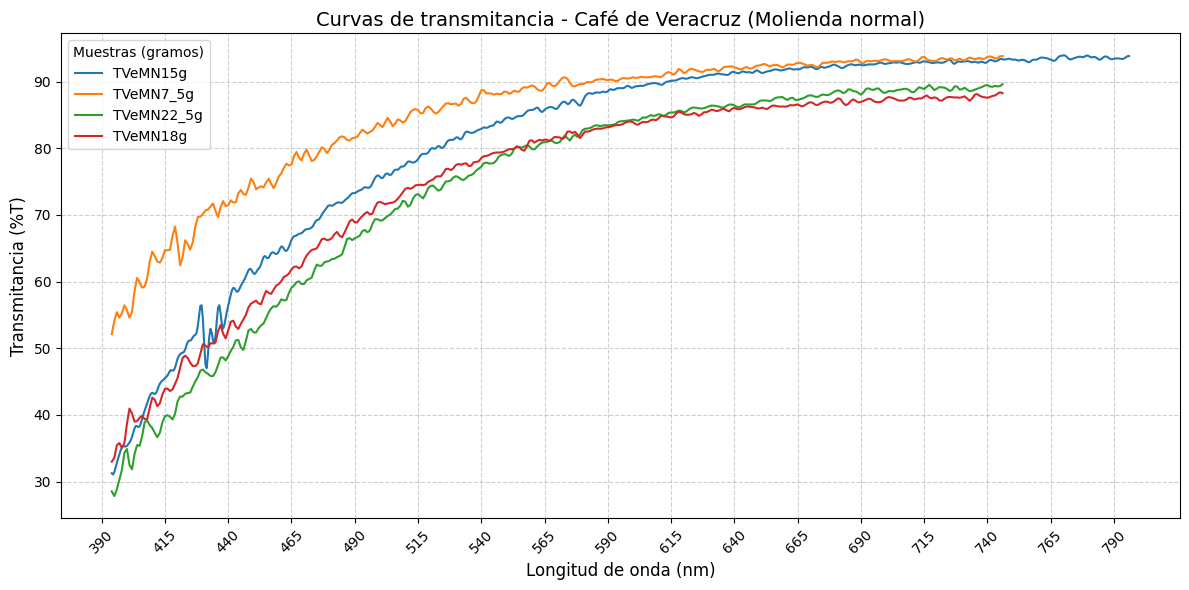

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargamos el archivo con las mediciones de transmitancia almacenados en una matriz de datos
df = pd.read_csv("TVeMN_matrix.csv")

# Limpiamos datos fuera del rango de %T [0, 100]
for columna in df.columns[1:]:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    df.loc[(df[columna] < 0) | (df[columna] > 100), columna] = None

# Copiamos el DataFrame limpio
df_clean = df.copy()

# Obtenemos los valores máximos de cada curva
maximos = {
    columna: df_clean[columna].max(skipna=True)
    for columna in df_clean.columns[1:]
}

# Ordenamos de mayor a menor para que la leyenda coincida con las curvas
columnas_ordenadas = sorted(maximos, key=maximos.get, reverse=True)

# Creamos figura
plt.figure(figsize=(12, 6))

# Dibujamos las curvas solo con valores válidos (sin NaNs)
for columna in columnas_ordenadas:
    datos_validos = df_clean[['nm', columna]].dropna()
    plt.plot(datos_validos['nm'], datos_validos[columna], label=columna)

# Etiquetas y estilo (estética de los ejes)
plt.xlabel('Longitud de onda (nm)', fontsize=12)
plt.ylabel('Transmitancia (%T)', fontsize=12)
plt.title('Curvas de transmitancia - Café de Veracruz (Molienda normal)', fontsize=14)
plt.legend(title='Muestras (gramos)', fontsize=10)
plt.xticks(df['nm'][::50], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import plotly.graph_objects as go

# Cargar el archivo CSV
df = pd.read_csv("TVeMN_matrix.csv")

# Limpiar datos: convertir a numérico y limitar entre 0 y 100
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].where((df[col] >= 0) & (df[col] <= 100))

# Copia para procesar
df_clean = df.copy()

# Calcular máximos válidos por columna
maximos = {
    col: df_clean[col].max(skipna=True)
    for col in df_clean.columns[1:]
}

# Ordenar de mayor a menor según valor máximo
columnas_ordenadas = sorted(maximos, key=maximos.get, reverse=True)

# Crear figura de Plotly
fig = go.Figure()

# Agregar cada curva a la figura
for col in columnas_ordenadas:
    datos_validos = df_clean[['nm', col]].dropna()
    fig.add_trace(go.Scatter(
        x=datos_validos['nm'],
        y=datos_validos[col],
        mode='lines',
        name=col
    ))

# Estilo general de la gráfica
fig.update_layout(
    title="Curvas de transmitancia - Café de Veracruz (Molienda normal)",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Transmitancia (%T)",
    legend_title="Muestras (gramos)",
    template="plotly_white",
    width=1000,
    height=500
)

# Mostrar en notebook/editor
fig.show()

# Guardar como archivo interactivo HTML
fig.write_html("grafica_transmitancia.html")






In [30]:
import pandas as pd
import plotly.graph_objects as go

# Cargar el archivo CSV
df = pd.read_csv("TVeMN_matrix.csv")

# Limpiar datos: convertir a numérico y limitar entre 0 y 100
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].where((df[col] >= 0) & (df[col] <= 100))

# Copia para procesar
df_clean = df.copy()

# Calcular máximos válidos por columna
maximos = {
    col: df_clean[col].max(skipna=True)
    for col in df_clean.columns[1:]
}

# Ordenar de mayor a menor según valor máximo
columnas_ordenadas = sorted(maximos, key=maximos.get, reverse=True)

# Crear figura de Plotly
fig = go.Figure()

# Agregar cada curva a la figura
for col in columnas_ordenadas:
    datos_validos = df_clean[['nm', col]].dropna()
    fig.add_trace(go.Scatter(
        x=datos_validos['nm'],
        y=datos_validos[col],
        mode='lines',
        name=col
    ))

# Estilo general de la gráfica con autosize
fig.update_layout(
    title="Curvas de transmitancia - Café de Veracruz (Molienda normal)",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Transmitancia (%T)",
    legend_title="Muestras (gramos)",
    template="plotly_white",
    autosize=True,
    height=500,
    margin=dict(l=60, r=40, t=60, b=60)
)

# Guardar como archivo HTML interactivo
fig.write_html("grafica_transmitancia.html")

# Mostrar en Jupyter/VSCode
fig.show()



In [31]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# Cargar el archivo CSV
df = pd.read_csv("TVeMN_matrix.csv")

# Limpiar datos: convertir a numérico y limitar entre 0 y 100
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].where((df[col] >= 0) & (df[col] <= 100))

df_clean = df.copy()

# Calcular máximos válidos por columna
maximos = {
    col: df_clean[col].max(skipna=True)
    for col in df_clean.columns[1:]
}
columnas_ordenadas = sorted(maximos, key=maximos.get, reverse=True)

# Crear gráfica con Plotly
fig = go.Figure()
for col in columnas_ordenadas:
    datos_validos = df_clean[['nm', col]].dropna()
    fig.add_trace(go.Scatter(x=datos_validos['nm'], y=datos_validos[col],
                             mode='lines', name=col))

fig.update_layout(
    title="Curvas de transmitancia - Café de Veracruz (Molienda normal)",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Transmitancia (%T)",
    legend_title="Muestras (gramos)",
    template="plotly_white",
    autosize=True,
    height=500,
    margin=dict(l=60, r=40, t=60, b=60)
)

# Exportar la gráfica como HTML en string
graph_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

# Crear tabla de máximos como HTML
tabla_maximos = pd.DataFrame({
    "Muestra (g)": list(maximos.keys()),
    "Transmitancia Máxima (%)": list(maximos.values())
}).sort_values(by="Transmitancia Máxima (%)", ascending=False)

tabla_html = tabla_maximos.to_html(index=False, border=0, classes="tabla-datos")

# HTML completo enriquecido
html_completo = f"""
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>Reporte UV-Vis - Café de Veracruz</title>
    <style>
        body {{
            font-family: "Segoe UI", sans-serif;
            margin: 40px;
            background-color: #fdfdfd;
        }}
        h1 {{
            color: #2c3e50;
        }}
        .tabla-datos {{
            border-collapse: collapse;
            width: 50%;
            margin-top: 20px;
        }}
        .tabla-datos th, .tabla-datos td {{
            border: 1px solid #ccc;
            padding: 8px;
            text-align: center;
        }}
        .tabla-datos th {{
            background-color: #e0e0e0;
        }}
    </style>
</head>
<body>
    <h1>Reporte de Transmitancia UV-Vis</h1>
    <p><strong>Origen:</strong> Café de Veracruz (Molienda normal)</p>
    <p><strong>Fecha:</strong> {datetime.now().strftime('%d-%m-%Y %H:%M:%S')}</p>

    <!-- Gráfica interactiva -->
    {graph_html}

    <!-- Tabla resumen -->
    <h2>Transmitancia máxima por muestra</h2>
    {tabla_html}

</body>
</html>
"""

# Guardar HTML completo
with open("reporte_transmitancia.html", "w", encoding="utf-8") as f:
    f.write(html_completo)

print("✅ Reporte HTML enriquecido guardado como 'reporte_transmitancia.html'")


✅ Reporte HTML enriquecido guardado como 'reporte_transmitancia.html'


In [32]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# === Cargar datos ===
df = pd.read_csv("TVeMN_matrix.csv")

# === Limpiar datos ===
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].where((df[col] >= 0) & (df[col] <= 100))

df_clean = df.copy()

# === Obtener máximos ===
maximos = {
    col: df_clean[col].max(skipna=True)
    for col in df_clean.columns[1:]
}
tabla_maximos = pd.DataFrame.from_dict(maximos, orient="index", columns=["Transmitancia Máxima (%)"])
tabla_maximos.index.name = "Muestra (g)"
tabla_maximos = tabla_maximos.reset_index()
tabla_maximos["Transmitancia Máxima (%)"] = tabla_maximos["Transmitancia Máxima (%)"].map("{:.2f}".format)

# === Crear gráfica ===
fig = go.Figure()
columnas_ordenadas = sorted(maximos, key=maximos.get, reverse=True)

for col in columnas_ordenadas:
    datos_validos = df_clean[['nm', col]].dropna()
    fig.add_trace(go.Scatter(
        x=datos_validos['nm'],
        y=datos_validos[col],
        mode='lines',
        name=col
    ))

fig.update_layout(
    title="Curvas de transmitancia - Café de Veracruz (Molienda normal)",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Transmitancia (%T)",
    legend_title="Muestras (gramos)",
    template="plotly_white",
    autosize=True
)

# === Exportar como HTML ===
fecha_actual = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
html_grafica = fig.to_html(full_html=False, include_plotlyjs='cdn')

tabla_html = tabla_maximos.to_html(index=False, classes="styled-table", border=0)

html_total = f"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <title>Reporte de Transmitancia UV-Vis</title>
  <style>
    body {{
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      margin: 40px;
    }}
    h1 {{
      color: #222;
    }}
    .info {{
      margin-bottom: 20px;
    }}
    .styled-table {{
      border-collapse: collapse;
      margin-top: 20px;
      font-size: 1em;
      width: 100%;
      box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }}
    .styled-table thead tr {{
      background-color: #009879;
      color: #ffffff;
      text-align: left;
    }}
    .styled-table th, .styled-table td {{
      padding: 12px 15px;
      border: 1px solid #ddd;
    }}
    .styled-table tbody tr:nth-child(even) {{
      background-color: #f3f3f3;
    }}
    .conclusion {{
      margin-top: 40px;
    }}
  </style>
</head>
<body>
  <h1>Reporte de Transmitancia UV-Vis</h1>

  <div class="info">
    <p><strong>Origen:</strong> Café de Veracruz (Molienda normal)</p>
    <p><strong>Fecha:</strong> {fecha_actual}</p>
  </div>

  {html_grafica}

  <h2>Transmitancia máxima por muestra</h2>
  {tabla_html}

  <div class="conclusion">
    <h2>Conclusión</h2>
    <p>Las muestras con menor gramaje presentan mayor transmitancia, lo cual sugiere una menor absorción de luz debida a una concentración más baja de compuestos absorbentes. Este resultado es coherente con fenómenos ópticos observados en análisis de café mediante espectroscopía UV-Vis.</p>
  </div>

</body>
</html>
"""

with open("reporte_transmitancia.html", "w", encoding="utf-8") as f:
    f.write(html_total)

print("✅ Reporte generado: reporte_transmitancia.html")


✅ Reporte generado: reporte_transmitancia.html


In [33]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# === Cargar datos ===
df = pd.read_csv("TVeMN_matrix.csv")

# === Limpiar datos ===
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].where((df[col] >= 0) & (df[col] <= 100))

df_clean = df.copy()

# === Obtener máximos ===
maximos = {
    col: df_clean[col].max(skipna=True)
    for col in df_clean.columns[1:]
}
tabla_maximos = pd.DataFrame.from_dict(maximos, orient="index", columns=["Transmitancia Máxima (%)"])
tabla_maximos.index.name = "Muestra (g)"
tabla_maximos = tabla_maximos.reset_index()
tabla_maximos["Transmitancia Máxima (%)"] = tabla_maximos["Transmitancia Máxima (%)"].map("{:.2f}".format)

# === Crear gráfica ===
fig = go.Figure()
columnas_ordenadas = sorted(maximos, key=maximos.get, reverse=True)

for col in columnas_ordenadas:
    datos_validos = df_clean[['nm', col]].dropna()
    fig.add_trace(go.Scatter(
        x=datos_validos['nm'],
        y=datos_validos[col],
        mode='lines',
        name=col
    ))

fig.update_layout(
    title="Curvas de transmitancia - Café de Veracruz (Molienda normal)",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Transmitancia (%T)",
    legend_title="Muestras (gramos)",
    template="plotly_white",
    autosize=True
)

# === Exportar como HTML ===
fecha_actual = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
html_grafica = fig.to_html(full_html=False, include_plotlyjs='cdn')
tabla_html = tabla_maximos.to_html(index=False, classes="styled-table", border=0)

html_total = f"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <title>Reporte de Transmitancia UV-Vis | CafeLab</title>
  <style>
    body {{
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      margin: 40px;
      background-color: #fdfdfd;
      color: #222;
    }}
    h1 {{
      color: #1b1b1b;
      margin-bottom: 5px;
    }}
    h2 {{
      color: #333;
      margin-top: 40px;
    }}
    .info {{
      margin-bottom: 25px;
    }}
    .info p {{
      margin: 4px 0;
    }}
    .styled-table {{
      border-collapse: collapse;
      margin-top: 20px;
      font-size: 1em;
      width: 100%;
      box-shadow: 0 0 10px rgba(0, 0, 0, 0.08);
    }}
    .styled-table thead tr {{
      background-color: #00795f;
      color: #ffffff;
      text-align: left;
    }}
    .styled-table th, .styled-table td {{
      padding: 12px 15px;
      border: 1px solid #ddd;
    }}
    .styled-table tbody tr:nth-child(even) {{
      background-color: #f3f3f3;
    }}
    .footer {{
      margin-top: 60px;
      font-size: 0.95em;
      color: #444;
    }}
    .footer h3 {{
      margin-bottom: 5px;
    }}
    .footer p {{
      margin: 2px 0;
    }}
    .conclusion {{
      margin-top: 40px;
    }}
  </style>
</head>
<body>
  <h1>Reporte de Transmitancia UV-Vis</h1>

  <div class="info">
    <p><strong>Origen:</strong> Café de Veracruz (Molienda normal)</p>
    <p><strong>Fecha de generación:</strong> {fecha_actual}</p>
  </div>

  {html_grafica}

  <h2>Transmitancia máxima por muestra</h2>
  {tabla_html}

  <div>
    
    <p>Las muestras con menor gramaje presentan mayor transmitancia, lo cual sugiere una menor absorción de luz debida a una concentración más baja de compuestos absorbentes. Este resultado es coherente con fenómenos ópticos observados en análisis de café mediante espectroscopía UV-Vis.</p>
  </div>

  <div class="footer">
    <h2>Colaboradores del proyecto CafeLab</h2>
    <p><strong>Dr. Martín Rodolfo Palomino Merino</strong> — Profesor investigador, jefe responsable del laboratorio de caracterización de materiales (FCFM-BUAP).</p>
    <p><strong>Lizeth Jazmín Orozco García</strong> — Colaboradora principal</p>
    <p><strong>Julio Alfredo Ballinas García</strong> — Colaborador del proyecto</p>
  </div>

</body>
</html>
"""

# === Guardar reporte ===
with open("reporte_transmitancia_cafelab.html", "w", encoding="utf-8") as f:
    f.write(html_total)

print("✅ Reporte generado: reporte_transmitancia_cafelab.html")


✅ Reporte generado: reporte_transmitancia_cafelab.html


In [34]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# === Cargar datos ===
df = pd.read_csv("TVeMN_matrix.csv")

# === Limpiar datos ===
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].where((df[col] >= 0) & (df[col] <= 100))

df_clean = df.copy()

# === Obtener máximos ===
maximos = {
    col: df_clean[col].max(skipna=True)
    for col in df_clean.columns[1:]
}
tabla_maximos = pd.DataFrame.from_dict(maximos, orient="index", columns=["Transmitancia Máxima (%)"])
tabla_maximos.index.name = "Muestra (g)"
tabla_maximos = tabla_maximos.reset_index()
tabla_maximos["Transmitancia Máxima (%)"] = tabla_maximos["Transmitancia Máxima (%)"].map("{:.2f}".format)

# === Crear gráfica (responsive) ===
fig = go.Figure()
columnas_ordenadas = sorted(maximos, key=maximos.get, reverse=True)

for col in columnas_ordenadas:
    datos_validos = df_clean[['nm', col]].dropna()
    fig.add_trace(go.Scatter(
        x=datos_validos['nm'],
        y=datos_validos[col],
        mode='lines',
        name=col
    ))

fig.update_layout(
    title="Curvas de transmitancia - Café de Veracruz (Molienda normal)",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Transmitancia (%T)",
    legend_title="Muestras (gramos)",
    template="plotly_white",
    margin=dict(l=50, r=50, t=80, b=50),
)

# === Exportar como HTML ===
fecha_actual = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
html_grafica = fig.to_html(full_html=False, include_plotlyjs='cdn', config={"responsive": True})

tabla_html = tabla_maximos.to_html(index=False, classes="styled-table", border=0)

html_total = f"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <title>Reporte de Transmitancia UV-Vis</title>
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {{
      font-family: 'Segoe UI', Tahoma, sans-serif;
      margin: 40px;
      background-color: #fdfdfd;
      color: #222;
    }}
    h1 {{
      color: #111;
    }}
    h2 {{
      margin-top: 40px;
    }}
    .info {{
      margin-bottom: 20px;
    }}
    .lab {{
      margin-top: 40px;
      font-size: 0.95em;
      background-color: #f0f8ff;
      padding: 15px;
      border-left: 6px solid #009879;
    }}
    .styled-table {{
      border-collapse: collapse;
      margin-top: 20px;
      font-size: 1em;
      width: 100%;
      box-shadow: 0 0 10px rgba(0, 0, 0, 0.05);
    }}
    .styled-table thead tr {{
      background-color: #009879;
      color: #ffffff;
      text-align: left;
    }}
    .styled-table th, .styled-table td {{
      padding: 12px 15px;
      border: 1px solid #ddd;
    }}
    .styled-table tbody tr:nth-child(even) {{
      background-color: #f3f3f3;
    }}
    .conclusion {{
      margin-top: 40px;
    }}
    /* Gráfica responsive */
    .plotly-graph-div {{
      width: 100% !important;
      height: auto !important;
    }}
  </style>
</head>
<body>

  <h1>Reporte de Transmitancia UV-Vis</h1>

  <div class="info">
    <p><strong>Origen:</strong> Café de Veracruz (Molienda normal)</p>
    <p><strong>Fecha:</strong> {fecha_actual}</p>
  </div>

  {html_grafica}

  <h2>Transmitancia máxima por muestra</h2>
  {tabla_html}

  <div class="conclusion">
    <h2>Conclusión</h2>
    <p>Las muestras con menor gramaje presentan mayor transmitancia, lo cual sugiere una menor absorción de luz debida a una concentración más baja de compuestos absorbentes. Este resultado es coherente con fenómenos ópticos observados en análisis de café mediante espectroscopía UV-Vis.</p>
  </div>

  <div class="lab">
    <strong>Nombre del proyecto: CafeLab</strong><br><br>
    <strong>Colaboradores:</strong><br>
    Martín Rodolfo Palomino Merino – Profesor investigador, jefe responsable del laboratorio de caracterización de materiales (FCFM-BUAP).<br>
    Lizeth Jazmín Orozco García – Colaborador principal.<br>
    Julio Alfredo Ballinas García – Colaborador del proyecto.
  </div>

</body>
</html>
"""

with open("reporte_transmitancia.html", "w", encoding="utf-8") as f:
    f.write(html_total)

print("✅ Reporte generado: reporte_transmitancia.html")


✅ Reporte generado: reporte_transmitancia.html


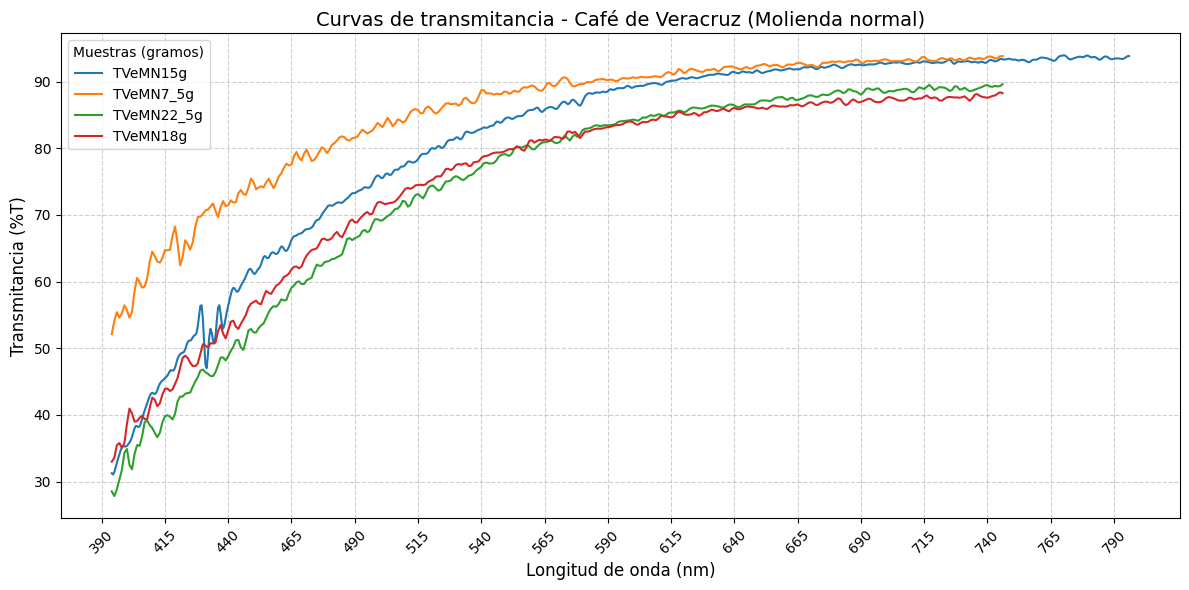

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

# Cargar archivo y limpiar
df = pd.read_csv("TVeMN_matrix.csv")
for columna in df.columns[1:]:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    df.loc[(df[columna] < 0) | (df[columna] > 100), columna] = None

# Copia limpia
df_clean = df.copy()

# Obtener máximos y ordenar
maximos = {
    columna: df_clean[columna].max(skipna=True)
    for columna in df_clean.columns[1:]
}
columnas_ordenadas = sorted(maximos, key=maximos.get, reverse=True)

# Crear figura
plt.figure(figsize=(12, 6))

# Dibujar curvas
for columna in columnas_ordenadas:
    datos_validos = df_clean[['nm', columna]].dropna()
    plt.plot(datos_validos['nm'], datos_validos[columna], label=columna)

# Etiquetas
plt.xlabel('Longitud de onda (nm)', fontsize=12)
plt.ylabel('Transmitancia (%T)', fontsize=12)
plt.title('Curvas de transmitancia - Café de Veracruz (Molienda normal)', fontsize=14)
plt.legend(title='Muestras (gramos)', fontsize=10)
plt.xticks(df['nm'][::50], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Activar interactividad
mplcursors.cursor(hover=True)

plt.show()


In [36]:
import sys
print(sys.executable)



/home/jabg20/.pyenv/versions/ydata-env/bin/python


In [37]:
print(df.columns)

Index(['nm', 'TVeMN7_5g', 'TVeMN15g', 'TVeMN18g', 'TVeMN22_5g'], dtype='object')


In [38]:
TVeMN7_5g=datos["TVeMN7_5g"]
TVeMN15g=datos["TVeMN15g"]
TVeMN18g=datos["TVeMN18g"]
TVeMN22_5g=datos["TVeMN22_5g"]

In [39]:
TVeMN7_5g.value_counts()

TVeMN7_5g
93.080    2
93.467    2
86.706    2
92.493    2
93.039    2
         ..
83.737    1
83.323    1
84.032    1
84.568    1
85.758    1
Name: count, Length: 348, dtype: int64

In [40]:
TVeMN15g.value_counts()

TVeMN15g
92.852    3
92.916    3
93.480    2
93.311    2
93.300    2
         ..
80.687    1
80.974    1
81.169    1
81.262    1
79.923    1
Name: count, Length: 777, dtype: int64

In [41]:
TVeMN18g.value_counts()

TVeMN18g
68.895    2
86.911    2
87.583    2
85.664    1
85.583    1
         ..
73.394    1
72.894    1
72.426    1
72.043    1
74.534    1
Name: count, Length: 350, dtype: int64

In [42]:
TVeMN22_5g.value_counts()

TVeMN22_5g
88.558    2
89.287    2
88.916    2
88.739    2
86.156    1
         ..
70.903    1
70.478    1
70.038    1
69.848    1
72.460    1
Name: count, Length: 349, dtype: int64

In [43]:
TVeMN7_5g.describe()

count    353.000000
mean      85.002824
std       10.061187
min       52.130000
25%       80.780000
50%       89.495000
75%       92.434000
max       93.833000
Name: TVeMN7_5g, dtype: float64

In [44]:
TVeMN7_5g 

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
816   NaN
817   NaN
818   NaN
819   NaN
820   NaN
Name: TVeMN7_5g, Length: 821, dtype: float64

In [45]:
datos.head(10)

,nm,TVeMN7_5g,TVeMN15g,TVeMN18g,TVeMN22_5g
0,390.0,NaN,NaN,NaN,NaN
1,390.5,NaN,NaN,NaN,NaN
2,391.0,NaN,NaN,NaN,NaN
3,391.5,NaN,NaN,NaN,NaN
4,392.0,NaN,NaN,NaN,NaN
5,392.5,NaN,NaN,NaN,NaN
6,393.0,NaN,NaN,NaN,NaN
7,393.5,NaN,NaN,NaN,NaN
8,394.0,52.13,31.261,32.986,28.544
9,394.5,NaN,31.071,NaN,NaN


In [26]:
datos.head(30)

,nm,TVeMN7_5g,TVeMN15g,TVeMN18g,TVeMN22_5g
0,390.0,NaN,NaN,NaN,NaN
1,390.5,NaN,NaN,NaN,NaN
2,391.0,NaN,NaN,NaN,NaN
3,391.5,NaN,NaN,NaN,NaN
4,392.0,NaN,NaN,NaN,NaN
5,392.5,NaN,NaN,NaN,NaN
6,393.0,NaN,NaN,NaN,NaN
7,393.5,NaN,NaN,NaN,NaN
8,394.0,52.130,31.261,32.986,28.544
9,394.5,NaN,31.071,NaN,NaN


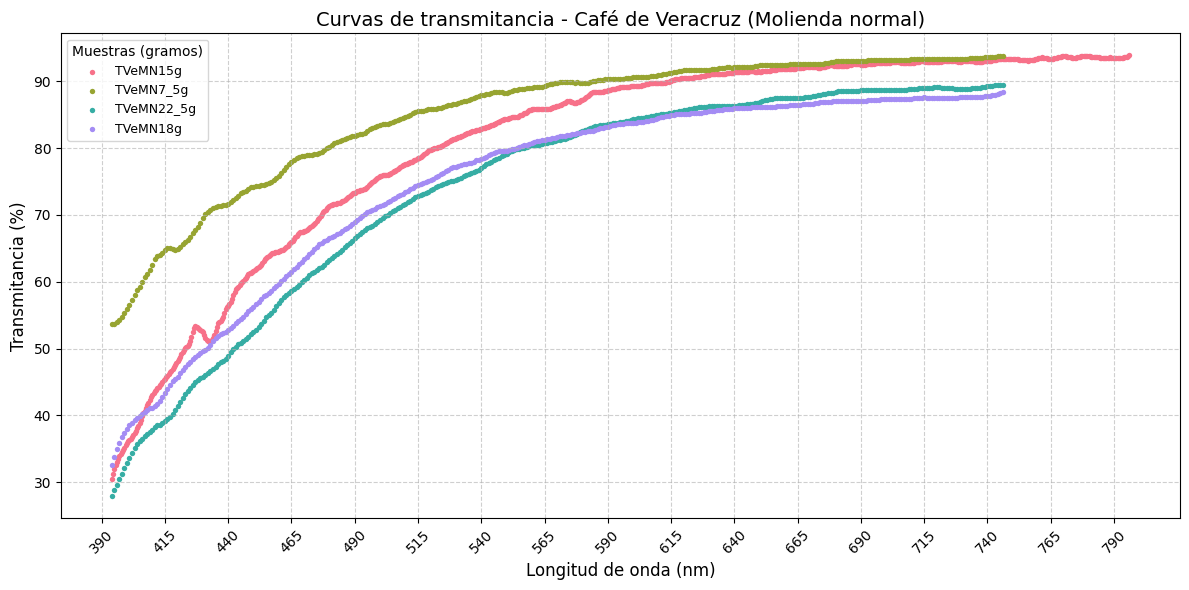

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sb
import numpy as np

# Cargamos el archivo con la matriz de transmitancia
df = pd.read_csv("TVeMN_matrix.csv")

# Convertimos columnas a valores numéricos y filtramos %T fuera de rango
for columna in df.columns[1:]:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    df.loc[(df[columna] < 0) | (df[columna] > 100), columna] = None

# Obtenemos máximos de las curvas suavizadas
max_transmitancia = {}

for columna in df.columns[1:]:
    datos_validos = df[columna].dropna()
    if len(datos_validos) >= 21:
        y_suave = savgol_filter(datos_validos, window_length=21, polyorder=3)
        max_transmitancia[columna] = np.max(y_suave)
    else:
        max_transmitancia[columna] = -np.inf  # Muy bajo para que quede al final

# Ordenamos columnas por su valor máximo suavizado
columnas_ordenadas = sorted(max_transmitancia, key=max_transmitancia.get, reverse=True)

# usamos una paleta de color bonita
colores = sb.color_palette("husl", len(columnas_ordenadas))

# Se genera la figura
plt.figure(figsize=(12, 6))

# Graficamos curvas suavizadas o línea discontinua si hay pocos datos
for i, columna in enumerate(columnas_ordenadas):
    datos_validos = df[columna].dropna()
    if len(datos_validos) >= 21:
        y_suave = savgol_filter(datos_validos, window_length=21, polyorder=3)
        x_vals = df['nm'][datos_validos.index]
        sb.scatterplot(x=x_vals, y=y_suave, s=15, label=columna, color=colores[i], linewidth=0)
    else:
        plt.plot(df['nm'], df[columna], label=columna, color=colores[i], linestyle='--')

# Estética de ejes
plt.xlabel('Longitud de onda (nm)', fontsize=12)
plt.ylabel('Transmitancia (%)', fontsize=12)
plt.title('Curvas de transmitancia - Café de Veracruz (Molienda normal)', fontsize=14)
plt.legend(title='Muestras (gramos)', fontsize=9)
plt.xticks(df['nm'][::50], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


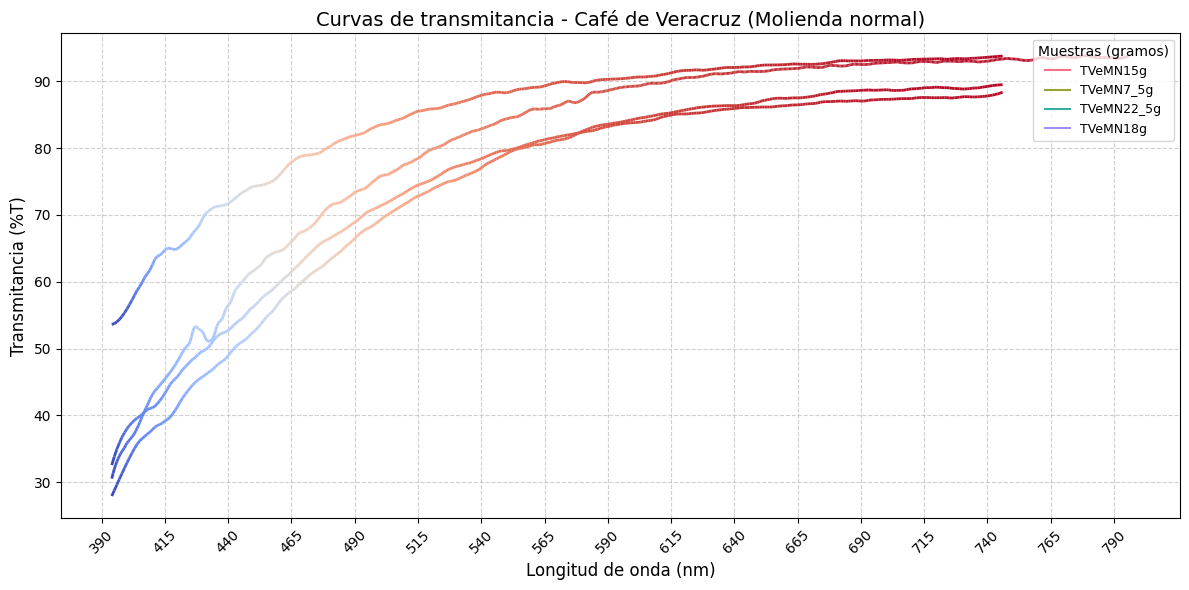

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import seaborn as sb
import numpy as np

# Cargamos el archivo con las mediciones de transmitancia alamacenados en una matriz de datos
df = pd.read_csv("TVeMN_matrix.csv")

# Convertimos a valores numéricos y filtramos %T fuera de rango
for columna in df.columns[1:]:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    df.loc[(df[columna] < 0) | (df[columna] > 100), columna] = None

# Diccionario de máximos suavizados
max_transmitancia = {}

# Calculamos máximos suavizados de cada columna
for columna in df.columns[1:]:
    datos_validos = df[columna].dropna()
    if len(datos_validos) >= 21:
        y_suave = savgol_filter(datos_validos, window_length=21, polyorder=3)
        max_transmitancia[columna] = np.max(y_suave)
    else:
        max_transmitancia[columna] = np.nan

# Ordenamos columnas por valor máximo
columnas_ordenadas = sorted(max_transmitancia, key=max_transmitancia.get, reverse=True)

# Figura principal
plt.figure(figsize=(12, 6))
plt.title("Curvas de transmitancia - Café de Veracruz (Molienda normal)", fontsize=14)

# Paleta base para la leyenda
colores_base = sb.color_palette("husl", len(columnas_ordenadas))

# Plot con LineCollection
for i, columna in enumerate(columnas_ordenadas):
    datos_validos = df[['nm', columna]].dropna()

    if len(datos_validos) >= 21:
        y_suave = savgol_filter(datos_validos[columna], window_length=21, polyorder=3)
        x = datos_validos['nm'].values
        y = y_suave

        puntos = np.array([x, y]).T.reshape(-1, 1, 2)
        segmentos = np.concatenate([puntos[:-1], puntos[1:]], axis=1)

        norm = mcolors.Normalize(vmin=np.min(y), vmax=np.max(y))
        lc = LineCollection(segmentos, cmap='coolwarm', norm=norm)
        lc.set_array(y)
        lc.set_linewidth(2.0)
        plt.gca().add_collection(lc)

        # Para que aparezca en la leyenda
        plt.plot([], [], color=colores_base[i], label=columna)
    else:
        plt.plot(df['nm'], df[columna], linestyle='--', color=colores_base[i], label=columna)

# Ejes y estilo
plt.xlabel("Longitud de onda (nm)", fontsize=12)
plt.ylabel("Transmitancia (%T)", fontsize=12)
plt.legend(title="Muestras (gramos)", fontsize=9)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(df['nm'][::50], rotation=45)
plt.tight_layout()
plt.show()


In [58]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# === Cargar archivo de transmitancia ===
ruta = "TVeMN_matrix.csv"
df = pd.read_csv(ruta)

# === Columnas
col_nm = [c for c in df.columns if 'nm' in c.lower()][0]
col_transmitancia = [c for c in df.columns if c != col_nm]

# === Regiones espectrales
regiones = {
    '100–200 nm': (100, 200),
    '200–300 nm': (200, 300),
    '300–400 nm': (300, 400),
    '400–500 nm': (400, 500),
    '500–600 nm': (500, 600),
    '600–700 nm': (600, 700),
    '700–800 nm': (700, 800)
}

# === Colores
colormap_base = plt.get_cmap('tab10')
colormap = colormap_base(np.linspace(0, 1, len(col_transmitancia)))
colores_hex = [mcolors.to_hex(c) for c in colormap]

# === Figura
fig = go.Figure()
fig.update_layout(
    title="Curvas de transmitancia - Café de Veracruz (Molienda normal)",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Transmitancia (%)",
    legend_title="Curva",
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=40),
)

# === Métricas
metricas = []
for i, col in enumerate(col_transmitancia):
    datos = df[[col_nm, col]].dropna().rename(columns={col_nm: 'nm', col: 'transmitancia'})
    datos['transmitancia'] = pd.to_numeric(datos['transmitancia'], errors='coerce')
    datos = datos.dropna()
    if datos.empty:
        continue

    fig.add_trace(go.Scatter(
        x=datos['nm'],
        y=datos['transmitancia'],
        mode='lines',
        name=col,
        line=dict(color=colores_hex[i])
    ))

    max_val = datos['transmitancia'].max()
    min_val = datos['transmitancia'].min()
    avg = datos['transmitancia'].mean()
    std = datos['transmitancia'].std()
    auc = np.trapezoid(datos['transmitancia'], datos['nm'])
    lambda_max = datos['nm'][datos['transmitancia'].idxmax()]
    lambda_min = datos['nm'][datos['transmitancia'].idxmin()]

    proms_reg = {}
    for region, (a, b) in regiones.items():
        reg_vals = datos.loc[(datos['nm'] >= a) & (datos['nm'] <= b), 'transmitancia']
        proms_reg[region] = f"{reg_vals.mean():.2f}" if not reg_vals.empty else "—"

    metricas.append({
        'Color de curva': colores_hex[i],
        'Curva': col,
        'Máx (%T)': round(max_val, 2),
        'Mín (%T)': round(min_val, 2),
        'Promedio (%)': round(avg, 2),
        'Desv. Std': round(std, 2),
        'AUC': round(auc, 2),
        'λ máx (nm)': round(lambda_max, 2),
        'λ mín (nm)': round(lambda_min, 2),
        **proms_reg
    })

# === Tabla HTML
df_metricas = pd.DataFrame(metricas)
tabla_html = "<table class='styled-table'><thead><tr>"
for col in df_metricas.columns:
    tabla_html += f"<th>{col}</th>"
tabla_html += "</tr></thead><tbody>"
for _, row in df_metricas.iterrows():
    tabla_html += "<tr>"
    for col in df_metricas.columns:
        if col == "Color de curva":
            tabla_html += f"<td style='background-color:{row[col]};'></td>"
        else:
            tabla_html += f"<td>{row[col]}</td>"
    tabla_html += "</tr>"
tabla_html += "</tbody></table>"

# === HTML Final
fecha = datetime.now().strftime('%d-%m-%Y %H:%M:%S')
grafica_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

html_final = f"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <title>Reporte de Transmitancia UV-Vis</title>
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {{
      font-family: 'Segoe UI', Tahoma, sans-serif;
      margin: 40px;
      background-color: #fdfdfd;
      color: #222;
    }}
    h1 {{
      color: #111;
    }}
    h2 {{
      margin-top: 40px;
    }}
    .info {{
      margin-bottom: 20px;
    }}
    .lab {{
      margin-top: 40px;
      font-size: 0.95em;
      background-color: #f0f8ff;
      padding: 15px;
      border-left: 6px solid #009879;
    }}
    .styled-table {{
      border-collapse: collapse;
      margin-top: 20px;
      font-size: 1em;
      width: 100%;
      box-shadow: 0 0 10px rgba(0, 0, 0, 0.05);
    }}
    .styled-table thead tr {{
      background-color: #009879;
      color: #ffffff;
      text-align: left;
    }}
    .styled-table th, .styled-table td {{
      padding: 12px 15px;
      border: 1px solid #ddd;
      text-align: center;
    }}
    .styled-table tbody tr:nth-child(even) {{
      background-color: #f3f3f3;
    }}
    .plotly-graph-div {{
      width: 100% !important;
      height: auto !important;
    }}
  </style>
</head>
<body>

  <h1>Curvas de transmitancia - Café de Veracruz (Molienda normal)</h1> 

  <div class="info">
    <p><strong>Fecha:</strong> {fecha}</p>
  </div>

  {grafica_html}

  <h2>Métricas espectrales por curva</h2>
  {tabla_html}

  <div>
    <p>Las curvas de transmitancia permiten identificar la transparencia relativa de la muestra a lo largo del espectro. Una menor transmitancia puede sugerir absorción fuerte en ciertas regiones, lo cual es útil para análisis de compuestos activos presentes en el café.</p>
  </div>

  <div class="lab">
    <strong>Nombre del proyecto: CafeLab</strong><br><br>
    <strong>Colaboradores:</strong><br>
    Martín Rodolfo Palomino Merino – Profesor investigador, jefe responsable del laboratorio de caracterización de materiales (FCFM-BUAP).<br>
    Lizeth Jazmín Orozco García – Colaborador principal.<br>
    Julio Alfredo Ballinas García – Colaborador del proyecto.
  </div>

</body>
</html>
"""

# === Guardar archivo
with open("Comparativa_muestras_transmitancia.html", "w", encoding="utf-8") as f:
    f.write(html_final)

print("✅ HTML generado: Comparativa_muestras_transmitancia.html")
print("Rango de longitudes de onda:", df['nm'].min(), "a", df['nm'].max())
fig.show()

✅ HTML generado: Comparativa_muestras_transmitancia.html
Rango de longitudes de onda: 390.0 a 800.0
